In [23]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

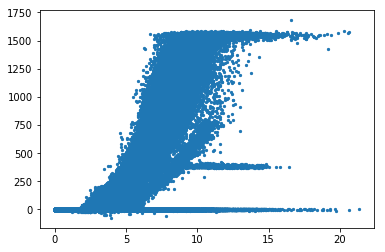

In [24]:
#读取数据
dataset = pd.read_csv('2-Copy1.csv',encoding='gbk')
#丢弃缺失数据，数据类型转换
dataset.dropna(how='any',inplace=True)
#数据读入
x=dataset['风速'].values
p=dataset['功率'].values
#数据可视化
plt.scatter(x,p,s=5)

No handles with labels found to put in legend.


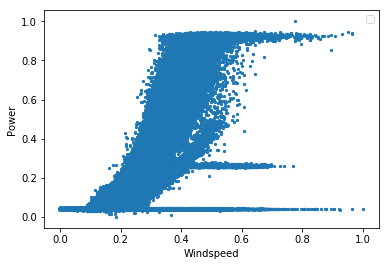

In [46]:
#数据归一化
min_max_scaler_x = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler_x.fit_transform(x.reshape(-1, 1))

min_max_scaler_p = preprocessing.MinMaxScaler()
p_minmax = min_max_scaler_p.fit_transform(p.reshape(-1, 1))
plt.scatter(x_minmax,p_minmax,s=5)
plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.show()

In [26]:
#数据划分 训练数据：80% 测试数据：20%
import math
train_size=math.ceil(0.8*x.shape[0])
test_size=x.shape[0]-train_size

x_train=x_minmax[0:train_size]
x_test=x_minmax[train_size:]
p_train=p_minmax[0:train_size]
p_test=p_minmax[train_size:]

In [43]:
import keras.backend as K
import tensorflow as tf
def huber_quantile(y_true,y_pred,delta=0.05):
    q= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    q=K.variable(q, dtype=None, name=None, constraint=None)
    e_huber=y_true-y_pred[4]
    e_quantile= (y_true-y_pred)
    residual = K.abs(e_huber)
    condition = K.less(residual, delta)
    small_res = 0.5 * K.square(residual)
    large_res = delta * residual - 0.5 * K.square(delta) 
    huber= tf.where(condition, small_res, large_res)
    quantile=K.mean(K.mean(K.maximum(q*e_quantile, (q-1)*e_quantile),axis=1),axis=0)
    huber_quantile=quantile+huber
    return  huber_quantile

In [44]:
#建立模型
model = Sequential()
model.add(Dense(output_dim=64,input_dim=1,activation='relu'))
model.add(Dense(output_dim=64,activation='relu'))
model.add(Dense(output_dim=9,activation='linear'))
model.compile(optimizer='adam',loss=huber_quantile)

#训练模型
history = model.fit(x_train, p_train,batch_size=10000,epochs=500,verbose=1,shuffle=True,validation_split=0.1)
p_pred = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="relu", units=64)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=9)`
  """


Train on 348400 samples, validate on 38712 samples
Epoch 1/500
348400/348400 [==============================] - 1s 3us/step - loss: 0.0973 - val_loss: 0.0386
Epoch 2/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0668 - val_loss: 0.0358
Epoch 3/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0535 - val_loss: 0.0227
Epoch 4/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0402 - val_loss: 0.0142
Epoch 5/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0340 - val_loss: 0.0120
Epoch 6/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0321 - val_loss: 0.0118
Epoch 7/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0321 - val_loss: 0.0116
Epoch 8/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0322 - val_loss: 0.0115
Epoch 9/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0327 - val

348400/348400 [==============================] - 0s 1us/step - loss: 0.0313 - val_loss: 0.0108
Epoch 152/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0318 - val_loss: 0.0108
Epoch 153/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0297 - val_loss: 0.0106
Epoch 154/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0298 - val_loss: 0.0105
Epoch 155/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0302 - val_loss: 0.0107
Epoch 156/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0313 - val_loss: 0.0108
Epoch 157/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0311 - val_loss: 0.0106
Epoch 158/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0299 - val_loss: 0.0107
Epoch 159/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0310 - val_loss: 0.0107
Epoch 160/500
348400/348400 [====

348400/348400 [==============================] - 0s 1us/step - loss: 0.0308 - val_loss: 0.0105
Epoch 302/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0315 - val_loss: 0.0108
Epoch 303/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0317 - val_loss: 0.0106
Epoch 304/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0320 - val_loss: 0.0107
Epoch 305/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0321 - val_loss: 0.0107
Epoch 306/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0298 - val_loss: 0.0105
Epoch 307/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0304 - val_loss: 0.0109
Epoch 308/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0324 - val_loss: 0.0106
Epoch 309/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0308 - val_loss: 0.0106
Epoch 310/500
348400/348400 [====

348400/348400 [==============================] - 0s 1us/step - loss: 0.0322 - val_loss: 0.0106
Epoch 452/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0305 - val_loss: 0.0105
Epoch 453/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0309 - val_loss: 0.0105
Epoch 454/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0309 - val_loss: 0.0109
Epoch 455/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0289 - val_loss: 0.0105
Epoch 456/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0323 - val_loss: 0.0107
Epoch 457/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0313 - val_loss: 0.0105
Epoch 458/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0293 - val_loss: 0.0105
Epoch 459/500
348400/348400 [==============================] - 0s 1us/step - loss: 0.0312 - val_loss: 0.0106
Epoch 460/500
348400/348400 [====

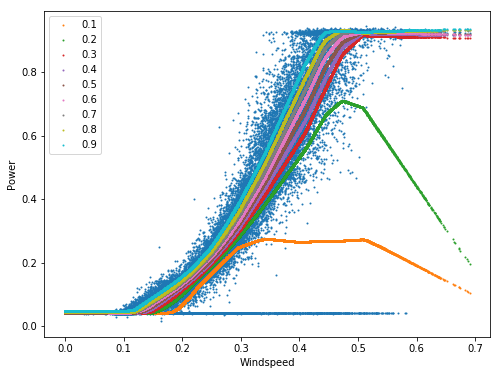

In [45]:
#huber+quantile
plt.figure(figsize=(8,6))
plt.scatter(x_test, p_test,s=1)
for i in range(9) :
    plt.scatter(x_test,p_pred[:,i],s=1,label=str((i+1)/10))
plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend()
plt.show()

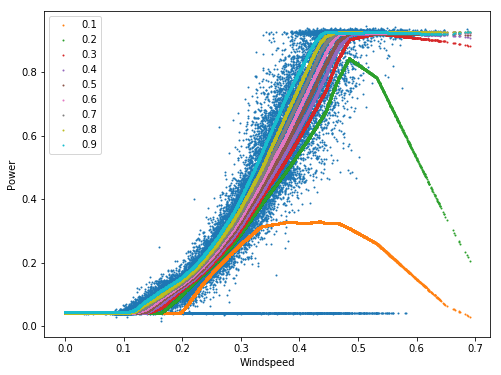

In [42]:
#quantile
plt.figure(figsize=(8,6))
plt.scatter(x_test, p_test,s=1)
for i in range(9) :
    plt.scatter(x_test,p_pred[:,i],s=1,label=str((i+1)/10))
plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend()
plt.show()

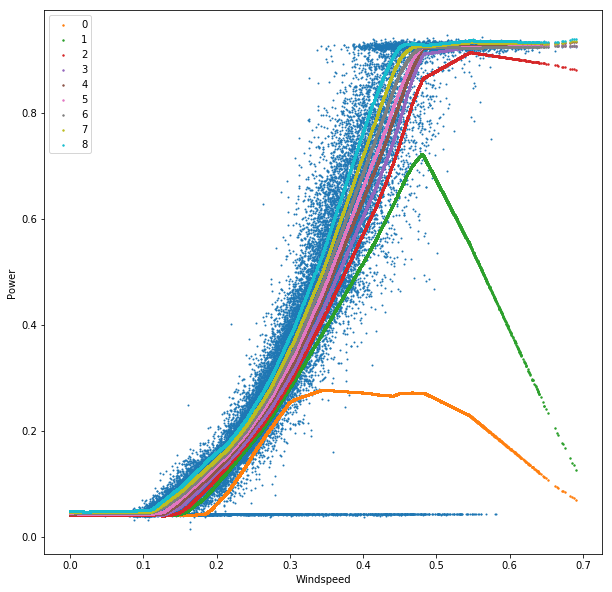

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x_test, p_test,s=1)
for i in range(9) :
    plt.scatter(x_test,p_pred[:,i],s=2,label=str(i))
plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend()
plt.show()

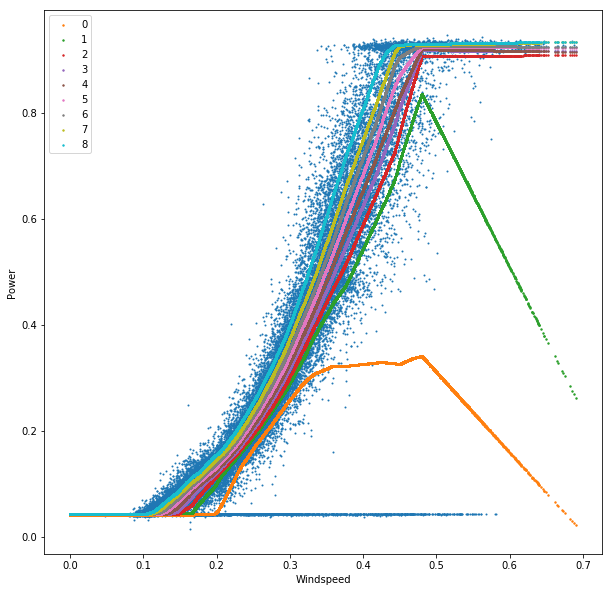

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(x_test, p_test,s=1)
for i in range(9) :
    plt.scatter(x_test,p_pred[:,i],s=2,label=str(i))
plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend()
plt.show()

In [ ]:
model_mse = Sequential()
model_mse.add(Dense(output_dim=64,input_dim=1,activation='relu'))
model_mse.add(Dense(output_dim=64,activation='relu'))
model_mse.add(Dense(output_dim=1,activation='linear'))
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_mse.compile(optimizer='adam',loss='mse')
# model.compile(optimizer='adam',loss='mse')

#训练模型
history_mse = model_mse.fit(x_train, p_train,batch_size=64,epochs=200,verbose=1,shuffle=True,validation_split=0.1)
p_pred_mse = model_mse.predict(x_test)

In [ ]:
#可视化结果
p_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(x_test, p_test,s=1)
plt.scatter(x_test,p_pred ,s=1,color='red')
plt.scatter(x_test, p_pred_mse,s=1)

plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend(['Test', 'Predict(huber_quantile)','Predict(mse)'], loc='upper left')
#误差分析
RMSE=100*np.sqrt(np.mean((p_test[:,0]-p_pred[:,0])**2))
print("RMSE: %f" % RMSE + "%")

RMSE=100*np.sqrt(np.mean((p_test[:,0]-p_pred_mse[:,0])**2))
print("RMSE: %f" % RMSE + "%")